In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')
import spin_models as spin
import Merger_rate_plot as merg


In [3]:
plt.style.use(['science'])
import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

In [4]:
import BH_binary_kicks_data as gw_kick
import BH_triple_kicks_data as sling_kick

In [12]:
threshold = 1500

In [13]:
df_gw = gw_kick.binary_kick_assign("Data/binary-merger-data.csv",)
df_gw.head()

,M1,M2,t_merger,Merger,Redshift,GW-kick-random-dry,GW-kick-aligned-5deg,GW-kick-aligned-cold,Type,BH1-ID,BH2-ID
0,2.261179e+06,1.629006e+06,8.587741e+08,Yes,6.459185,429.701906,59.676570,156.440885,iso,9223372036326575607,9223372036365264250
1,1.614773e+06,1.077349e+06,8.934006e+08,Yes,6.265176,621.857241,134.624052,717.610256,iso,9223372036330308081,9223372036383756962
2,6.554858e+06,1.175723e+06,4.120229e+09,Yes,1.587945,356.994248,186.436011,197.884957,iso,9223372036306477048,9223372036351439102
3,7.039616e+06,6.263608e+06,8.933714e+10,No,0.000000,1661.440553,96.177850,556.922206,iso,9223372036312285311,9223372036346956171
4,1.179139e+07,3.306548e+06,1.421714e+10,No,0.000000,417.681370,113.014168,137.105554,iso,9223372036300488336,9223372036365264250


In [14]:
df_sling = sling_kick.trip_kick_assign("Data/Triple_outcomes_N_50.csv")
df_sling.head()

,M1,qin,qout,z_triple,flag,Slingshot_kick,gw_kick_random,gw_kick_cold,gw_kick_5deg
0,5.074754e+06,0.616776,6.431441,3.257459,No,10527.311204,0.000000,0.000000,0.000000
1,3.064753e+07,0.374258,7.438098,1.101818,No,808.666195,0.000000,0.000000,0.000000
2,4.390793e+07,0.652869,0.641268,2.201414,Tr-ej,878.509528,842.941128,1819.204011,149.773341
3,1.734791e+07,0.375953,0.092859,3.276165,No,0.000000,0.000000,0.000000,0.000000
4,8.962945e+05,0.118907,453.836569,1.320180,Tr-12,7.913224,152.394683,98.894524,101.896934


In [15]:
sling_rate = []

for i in range(50):
    df_sling_i = df_sling[531*i:531*(i+1)]
    z_sling_i= df_sling_i[df_sling_i['Slingshot_kick']>threshold]["z_triple"]
    merger_rate_sling,lgzbins_sling,dNdlogzdt_sling = merg.merger_rate_log_plot(z_sling_i,zmax=7,zbinsize=0.2,lgzbinsize=0.2,lgzmin=-3,lgzmax=1)
    sling_rate.append(dNdlogzdt_sling)

sling_rate = np.array(sling_rate)

In [27]:

sling_rate = []
random_rate = []
deg5_rate=[]
cold_rate = []

for i in range(50):
    df_trip_i = df_sling[531*i:531*(i+1)]

    z_sling_i= df_trip_i[df_trip_i['Slingshot_kick']>threshold]["z_triple"]
    merger_rate_sling,lgzbins_sling,dNdlogzdt_sling = merg.merger_rate_log_plot(z_sling_i,zmax=7,zbinsize=0.2,lgzbinsize=0.2,lgzmin=-3,lgzmax=1)
    sling_rate.append(dNdlogzdt_sling)

    #random
    z_trip_i= df_trip_i[(df_trip_i["flag"]!="No") & (df_trip_i["gw_kick_random"]>threshold)]["z_triple"].to_numpy()
    z_GW_rand = df_gw[(df_gw["GW-kick-random-dry"]>threshold) & (df_gw["Merger"]=="Yes")]["Redshift"].to_numpy()
    z_rand = np.concatenate((z_trip_i,z_GW_rand))
    merger_rate_rand,lgzbins_rand,dNdlogzdt_rand = merg.merger_rate_log_plot(z_rand,zmax=7,zbinsize=0.2,lgzbinsize=0.22,lgzmin=-3,lgzmax=1)
    random_rate.append(dNdlogzdt_rand)

    #5deg
    z_trip_i= df_trip_i[(df_trip_i["flag"]!="No") & (df_trip_i["gw_kick_5deg"]>threshold)]["z_triple"].to_numpy()
    z_GW_5deg = df_gw[(df_gw["GW-kick-aligned-5deg"]>threshold) & (df_gw["Merger"]=="Yes")]["Redshift"].to_numpy()
    z_5deg = np.concatenate((z_trip_i,z_GW_5deg))
    merger_rate_5deg,lgzbins_5deg,dNdlogzdt_5deg = merg.merger_rate_log_plot(z_5deg,zmax=7,zbinsize=0.4,lgzbinsize=0.29,lgzmin=-3,lgzmax=1)
    deg5_rate.append(dNdlogzdt_5deg)

    #cold
    z_trip_i= df_trip_i[(df_trip_i["flag"]!="No") & (df_trip_i["gw_kick_cold"]>threshold)]["z_triple"].to_numpy()
    z_GW_cold = df_gw[(df_gw["GW-kick-aligned-cold"]>threshold) & (df_gw["Merger"]=="Yes")]["Redshift"].to_numpy()
    z_cold = np.concatenate((z_trip_i,z_GW_cold))
    merger_rate_cold,lgzbins_cold,dNdlogzdt_cold = merg.merger_rate_log_plot(z_cold,zmax=7,zbinsize=0.2,lgzbinsize=0.26,lgzmin=-3,lgzmax=1)
    cold_rate.append(dNdlogzdt_cold)

In [30]:
merger_rate_rand

0.016279844516311592

In [31]:
merger_rate_sling

0.011643468319967987

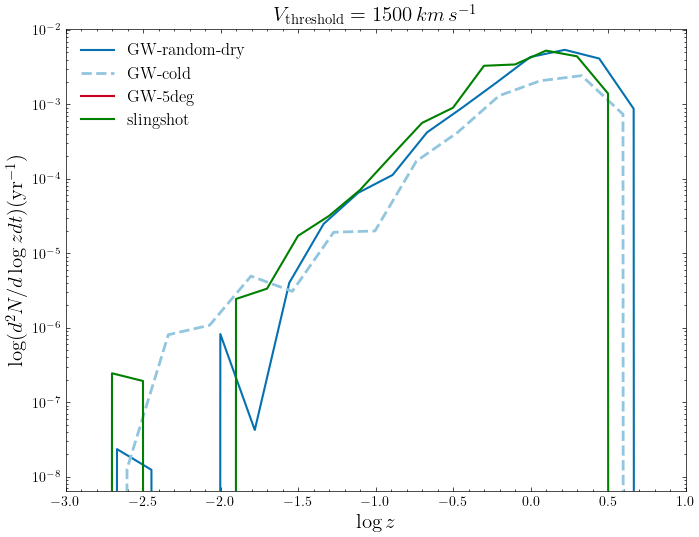

In [29]:
plt.figure(figsize=[8,6])
plt.plot(lgzbins_rand,np.mean(random_rate,axis=0),color="#0571b0",lw=1.5,label="GW-random-dry")
#plt.fill_between(lgzbins_rand,np.mean(random_rate,axis=0)-np.std(random_rate,axis=0),np.mean(random_rate,axis=0)+np.std(random_rate,axis=0))
plt.plot(lgzbins_cold,np.mean(cold_rate,axis=0),color="#92c5de",lw=2,linestyle="--",label="GW-cold")
plt.plot(lgzbins_5deg,np.mean(deg5_rate,axis=0),color="#ca0020",lw=1.5,label="GW-5deg")
#plt.fill_between(lgzbins_5deg,np.mean(deg5_rate,axis=0)-np.std(deg5_rate,axis=0),np.mean(deg5_rate,axis=0)+np.std(deg5_rate,axis=0))

plt.plot(lgzbins_sling,np.mean(sling_rate,axis=0),color="green",lw=1.5,label="slingshot")


#plt.fill_between(lgzbins_sling,np.mean(sling_rate,axis=0)-np.std(sling_rate,axis=0),np.mean(sling_rate,axis=0)+np.std(sling_rate,axis=0),color="green")
plt.yscale("log")
plt.legend(fontsize=12)
plt.xlim(-3,1)
plt.xlabel("$\log z$",fontsize=15)
plt.ylabel(r"$\log (d^2 N / d \log z dt) (\text{yr}^{-1})$",fontsize=15)
plt.title(r"$V_{\text{threshold}} = %2d \, km \, s^{-1}$"%(threshold),fontsize=15)
plt.savefig("Figures/gw_kick_vs_slingshot_for_%d.pdf"%(threshold))

Text(0.5, 1.0, '$V_{\\text{threshold}} = 500 \\, km \\, s^{-1}$')

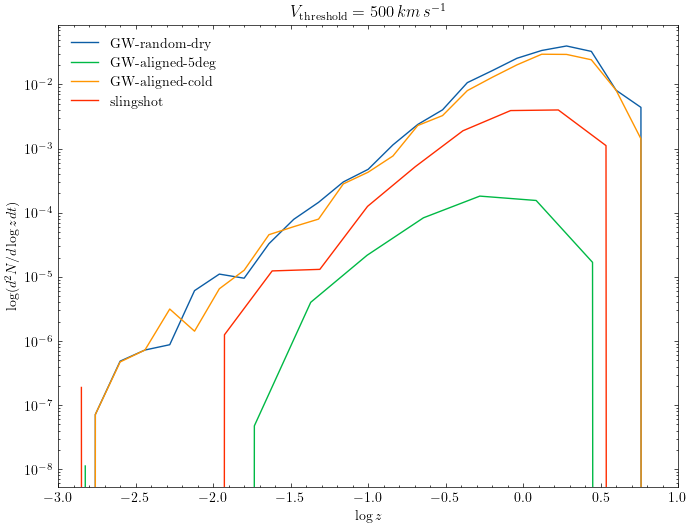

In [34]:
plt.figure(figsize=[8,6])
plt.plot(lgzbins_rand,np.mean(random_rate,axis=0),label="GW-random-dry")
#plt.fill_between(lgzbins_rand,np.mean(random_rate,axis=0)-np.std(random_rate,axis=0),np.mean(random_rate,axis=0)+np.std(random_rate,axis=0))

plt.plot(lgzbins_5deg,np.mean(deg5_rate,axis=0),label="GW-aligned-5deg")
#plt.fill_between(lgzbins_5deg,np.mean(deg5_rate,axis=0)-np.std(deg5_rate,axis=0),np.mean(deg5_rate,axis=0)+np.std(deg5_rate,axis=0))


plt.plot(lgzbins_cold,np.mean(cold_rate,axis=0),label="GW-aligned-cold")

plt.plot(lgzbins_sling,np.mean(sling_rate,axis=0),label="slingshot")
#plt.fill_between(lgzbins_sling,np.mean(sling_rate,axis=0)-np.std(sling_rate,axis=0),np.mean(sling_rate,axis=0)+np.std(sling_rate,axis=0))
plt.yscale("log")
plt.legend()
plt.xlim(-3,1)
plt.xlabel("$\log z$")
plt.ylabel("$\log (d^2 N / d \log z dt)$")
plt.title(r"$V_{\text{threshold}} = %2d \, km \, s^{-1}$"%(threshold))
#plt.savefig("Figures/GW_kick_vs_slingshot_for_%d.pdf"%(threshold))

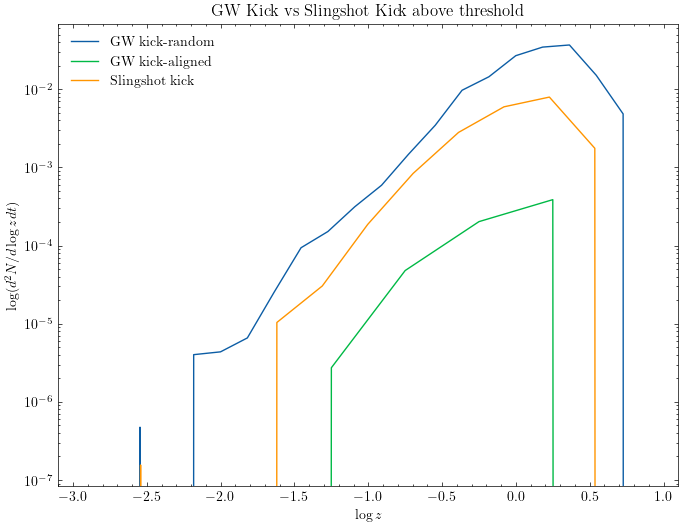

In [165]:
plt.figure(figsize=[8,6])
plt.plot(lgzbins_GW_r,dNdlogzdt_GW_r,label="GW kick-random")
plt.plot(lgzbins_GW,dNdlogzdt_GW,label="GW kick-aligned")
plt.plot(lgzbins_sling,dNdlogzdt_sling,label="Slingshot kick")
plt.xlabel("$\log z$")
plt.ylabel("$\log (d^2 N / d \log z dt)$")
plt.yscale("log")
plt.legend()
plt.title("GW Kick vs Slingshot Kick above threshold")
plt.savefig("Figures/GW_kick_aligned_vs_slingshot_rates.pdf")